In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('3Dprinter_data.csv')

In [10]:
features = ['Nozzle Temp (C)', 'Bed Temp (C)', 'Fan Speed (RPM)', 'Print Speed (mm/s)']
target = 'Vibrations'

X = data[features]
y = data[target]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

import lightgbm as lgb


In [13]:
model = lgb.LGBMRegressor(learning_rate=0.1)
model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 267, number of used features: 4
[LightGBM] [Info] Start training from score 0.096907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor()

In [16]:
from sklearn import impute


future_data = []
for day in range(60):
    for hour in range(24):
        future_data.append([220 + np.random.randint(-10, 10),
                            60 + np.random.randint(-5, 5),
                            4000,  
                            60])  


predicted_future_vibrations = model.predict(future_data)

In [17]:
actual_vibrations = [y.iloc[i] for i in range(len(y))] 

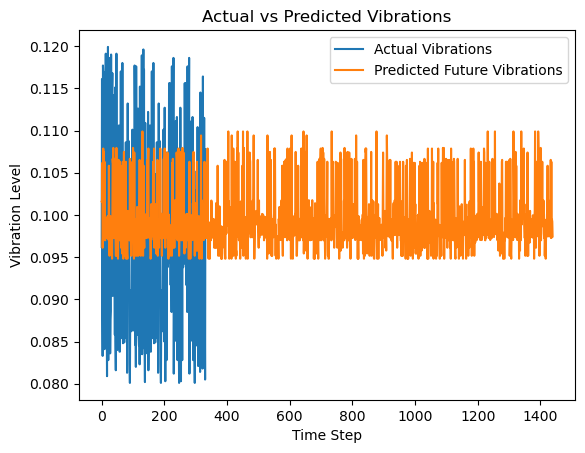

In [18]:
plt.plot(range(len(actual_vibrations)), actual_vibrations, label='Actual Vibrations')
plt.plot(range(len(predicted_future_vibrations)), predicted_future_vibrations, label='Predicted Future Vibrations')
plt.xlabel('Time Step')
plt.ylabel('Vibration Level')
plt.title('Actual vs Predicted Vibrations')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [20]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00015713725483505707
